In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import pathlib
from skimage.measure import compare_ssim as ssim, compare_psnr as psnr, compare_nrmse as nrmse
import cv2
import numpy as np

In [2]:
def plot_one(ax, true, pred, title=None, gray=True):
    """Plots predicted image and calculates measures: nrmse, ssim, psnr.

    Parameters
    ----------
    ax : 
        Matplotlib axes for plotting
    true : PIL.Image
        Ground truth Image for measures calculation
    pred : PIL.Image
        Predicted Image for measures calculation
    title : str, optional
        Set plot title
    gray : bool
        Flag, if true expecting grayscale image, if false RGB image"""
        
    label = 'NRMSE: {:.3f}; SSIM: {:.3f};  PSNR: {:.3f}'
    
    #convert images to numpy array
    if gray:
        arr_t = np.array(true)[:,:,0]
        arr_p = np.array(pred)[:,:,0]
        multichannel=False
    else:
        arr_t = np.array(true)
        arr_p = np.array(pred) 
        multichannel=True
    
    assert arr_t.shape==arr_p.shape, \
           f'Shapes of input images must match: true:{arr_t.shape} pred:{arr_p.shape}'
    
    ax.imshow(pred, cmap='gray', vmin=0, vmax=255)
    ax.set_axis_off()
    if title is not None: ax.set_title(title)
    ax.annotate(xy=(0,-.1), s=label.format(nrmse(arr_p, arr_t), 
                                           ssim(arr_p, arr_t,
                                           multichannel=multichannel), 
                                           psnr(arr_p, arr_t)),
                                           xycoords='axes fraction')
    

In [3]:
def pretty_plot(img_lr, img_pr, img_hr, labels=None):
    """Plots comparison of images.

    This function takes 3 images, Low resolution, Predicted and High resolution. 
    Resizes all images to the size of the predicted image and plots them using plot_one function. 
    Also creates additional image using bicubic interpolation. 
    
    Parameters
    ----------
    img_lr : PIL.Image
        Low resolution image
    img_pr : PIL.Image
        Predicted Image
    img_hr : PIL.Image
        High resolution image
    labels : list, optional
        List of labels for images to be used as titles."""
    
    n = 4
            
    fig, axes = plt.subplots(ncols=n, figsize=(16,5))
    
    shape =img_pr.size
    
    img_bc = img_lr.resize(shape, Image.BICUBIC)
    img_lr = img_lr.resize(shape, Image.NEAREST)
    img_hr = img_hr.resize(shape)

    imglst =[img_lr, img_bc, img_pr, img_hr]
    if labels is not None:
        assert n==len(labels), 'Wrong number of labels.'
    else:
        lbllst =['ablation', 'bicubic', 'model', 'true'] 
        
    for i, (img, txt) in enumerate(zip(imglst, lbllst)):
        plot_one(axes[i], img_hr, img, txt, gray=False)


In [45]:
# load data

samplename = 'I07_s1_w5'
path = './results/cells/'

img_lr = Image.open(path+samplename+'_LR.png').convert('LA')
img_pr = Image.open(path+samplename+'_PR.png').convert('LA')
img_hr = Image.open(path+samplename+'_HR.png').convert('LA')

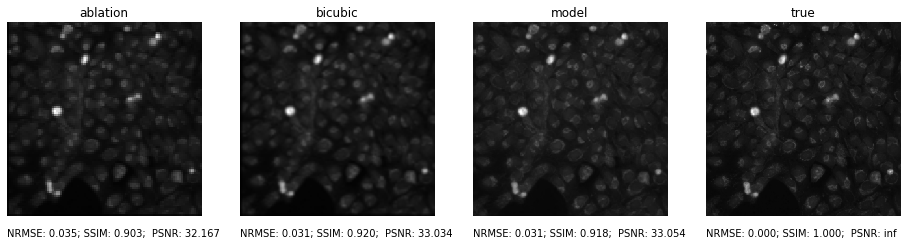

In [46]:
# plot and save

pretty_plot(img_lr, img_pr, img_hr)

plt.savefig(path+samplename+'_plot.png')

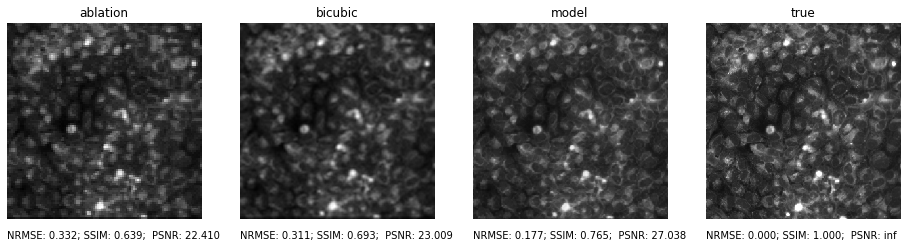

In [41]:
# correction for image shifting to right by laser ablation

pretty_plot(Image.fromarray(np.array(img_lr)[:,1:,0]),
            Image.fromarray(np.array(img_pr)[:,3:,0]),
            Image.fromarray(np.array(img_hr)[:,2:-3,0])
           )

#plt.savefig(path+samplename+'_plot_cor.png')